In [1]:
import os
import shutil
import sys
import time
import network

import numpy as np
from matplotlib import pyplot as plt
import sklearn.metrics as metrics


/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [28]:
datafile = 'Data/cc_images.mm'
labelsfile = 'Data/labels.mm'

In [65]:
cc = [0,3,7]
#cc = [0, 1, 2, 3, 4, 5, 6, 7, 8]
c = network.get_classifier(datafile, labelsfile, 32, 5, cc, channels=[0,1,3,4], ow=64)

reducing classes


In [66]:

try:
    shutil.rmtree('logs')
except:
    "couldn't delete"
    
time.sleep(1)
while os.path.exists('logs'):
    time.sleep(.1)

In [67]:
c.train(n_iter=20000, learning_rate=0.0003, droprate=0, l2f=.01)

Tensor("LeakyRelu_8:0", shape=(?, 4, 4, 32), dtype=float32)
***********************
0 2.0235343 2.0153482
1000 0.6938411 0.7592983
2000 0.6841973 0.77060926
3000 0.78761685 0.69918734
4000 0.5395788 0.7151935
5000 0.64032984 0.69013464
6000 0.6082583 0.60087323
7000 0.58773845 0.59775877
8000 0.47623393 0.54872674
9000 0.5405578 0.61980873
10000 0.5174978 0.58731073
11000 0.47432026 0.59115714
12000 0.48969463 0.425744
13000 0.41001067 0.45138803
14000 0.53493774 0.4828312
15000 0.39771312 0.43697014
16000 0.40700722 0.42817926
17000 0.3839471 0.44164896
18000 0.35225314 0.46873102
19000 0.45361412 0.54071176
[[466  28  16]
 [ 18 217   2]
 [  6   0  25]]


In [53]:
tb, tl = c.get_balanced_batch(c.val_images,
                              c.val_labels,
                              c.class_where_val,
                              800)

vl, vsm, vlb, vcm = c.sess.run([c.loss, c.softmax, c.label_batch, c.confmat],
                      feed_dict={c.image_batch:c.val_images,
                                 c.label_batch:c.val_labels,
                                 c.is_training:False})


In [54]:
tl.shape, np.argmax(vsm, axis=-1).shape
tls = np.argmax(c.val_labels, axis=-1)
vsms = np.argmax(vsm, axis=-1)

In [55]:
print(metrics.classification_report(tls, vsms))
print(metrics.accuracy_score(tls, vsms))

             precision    recall  f1-score   support

          0       0.94      0.92      0.93      1098
          1       0.94      0.83      0.89       490
          2       0.44      0.84      0.58        83

avg / total       0.92      0.89      0.90      1671

0.8934769599042489


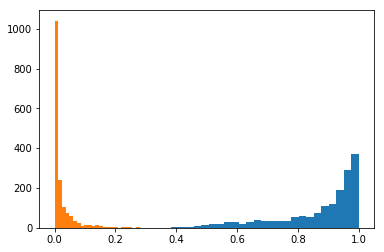

In [56]:
_ = plt.hist(np.max(vsm, axis=1), bins=25)
_ = plt.hist(np.min(vsm, axis=1), bins=25)

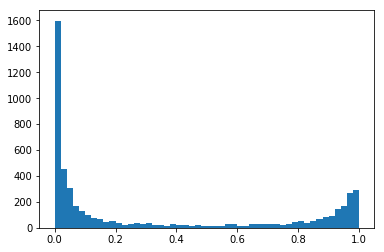

In [57]:
_ = plt.hist(np.resize(vsm, (-1)), bins=50)

In [58]:
cm = metrics.confusion_matrix(tls, vsms)
#cm = cm/cm.sum(axis=1)
#import pandas as pd
#cmdf = pd.DataFrame(cm)
np.set_printoptions(precision=3)
print(cm)
print(cm.sum(axis=0, keepdims=True))
print(cm.sum(axis=1, keepdims=True))
print(cm.sum(axis=0).sum())
print(cm.sum(axis=1).sum())
print(cm.sum())
print()
print(metrics.confusion_matrix(tls, vsms))

[[1014   24   60]
 [  51  409   30]
 [  13    0   70]]
[[1078  433  160]]
[[1098]
 [ 490]
 [  83]]
1671
1671
1671

[[1014   24   60]
 [  51  409   30]
 [  13    0   70]]


In [59]:
np.count_nonzero(tls == 0), np.count_nonzero(vsms == 0)

(1098, 1078)

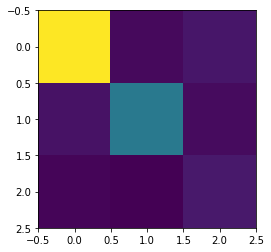

In [60]:
plt.imshow(cm, interpolation='nearest')

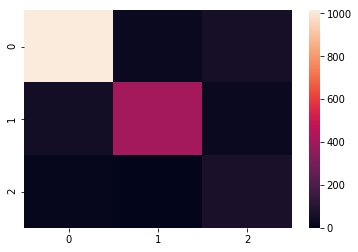

In [61]:
import seaborn as sns
sns.heatmap(cm)

In [18]:
c.images.shape, c.labels.shape

((35469, 32, 32, 4), (35469, 9))

In [19]:
all_loss, all_sm, _, _ = c.sess.run([c.loss, c.softmax, c.label_batch, c.confmat],
                      feed_dict={c.image_batch:c.images,
                                 c.label_batch:c.labels,
                                 c.is_training:False})


In [25]:
np.save('Data/all_pickle.pkl', all_sm)

(35469, 9)